# Práctica 1: primera exploración a los datos



## CRISP-DM methodology. 

It is one of the standard workflows followed by data mining good practices across the world. We will concentrate on the following sub-sections of this methodology:
* Data collection, task in **data understanding**: to understand different data retrieval mechanisms for different data types
* Data description, task in **data understanding**: to understand various attributes and properties of the data collected
* Data wrangling, task in **data preparation**: to prepare data for consumption in the modeling steps
* Data visualization, task in **data preparation**: to visualize different attributes for sharing results, better
understanding, and so on


![](https://s3.amazonaws.com/media-p.slid.es/uploads/848972/images/6801402/pasted-from-clipboard.png)

# Librerías

In [1]:
import pandas as pd
import numpy as np

# Importación de datos

In [2]:
# http://datamx.io/dataset/delitos-del-fuero-comun
path = '../fuerocomunmunicipios.csv'
df = pd.read_csv(path, encoding='latin', low_memory=False)
df.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


## ¿Cuántos datos tenemos?

In [3]:
print('Se cuenta con', df.shape[0], 'registros')
print('Y con', df.shape[1], 'variables')

Se cuenta con 5740636 registros
Y con 10 variables


## Nombres de cada variable

In [4]:
df.columns.values.tolist()

['state_code',
 'mun_code',
 'year',
 'month',
 'crime',
 'category',
 'type',
 'subtype',
 'count',
 'population']

## Tipo de variable

In [5]:
df.dtypes

state_code      int64
mun_code        int64
year            int64
month           int64
crime          object
category       object
type           object
subtype        object
count         float64
population      int64
dtype: object

## ¿Hay *missings*?

In [6]:
df.isnull().any().any()

True

## ¿Qué columnas contiene *missings*?

In [7]:
df.columns[df.isnull().any()].tolist()

['count']

## Estadísticos básicos

In [8]:
df.describe([x/10 for x in range(10)] + [0.95])

,state_code,mun_code,year,month,count,population
count,5.740636e+06,5.740636e+06,5.740636e+06,5.740636e+06,2.326253e+06,5.740636e+06
mean,1.899102e+01,9.452533e+01,2.012263e+03,6.004696e+00,2.308071e+00,5.235490e+04
std,7.608523e+00,1.188232e+02,9.405606e-01,3.479479e+00,1.984210e+01,1.450224e+05
min,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,9.000000e+01
0%,1.000000e+00,1.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,9.000000e+01
10%,8.000000e+00,8.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,2.008000e+03
20%,1.200000e+01,1.600000e+01,2.011000e+03,2.000000e+00,0.000000e+00,4.118000e+03
30%,1.500000e+01,2.600000e+01,2.012000e+03,3.000000e+00,0.000000e+00,6.694000e+03
40%,1.600000e+01,3.800000e+01,2.012000e+03,4.000000e+00,0.000000e+00,1.035600e+04
50%,2.000000e+01,5.100000e+01,2.012000e+03,6.000000e+00,0.000000e+00,1.491100e+04


## Fila específica:

In [9]:
df.loc[[0]]

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483


## Filas específicas:

In [10]:
df.loc[30:33]

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
30,1,1,2013,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,47.0,842391
31,1,1,2013,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,48.0,843374
32,1,1,2013,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,39.0,844358
33,1,1,2013,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,845341


## Quitar filas específicas:

In [11]:
df.drop([0,24,51], axis=0).head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822


## Quitar filas específicas (en intervalo):

In [12]:
df.drop(df.index[1:5], axis=0).head(10)

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
5,1,1,2011,6,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,816822
6,1,1,2011,7,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,42.0,817861
7,1,1,2011,8,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,818900
8,1,1,2011,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,36.0,819939
9,1,1,2011,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,37.0,820978
10,1,1,2011,11,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,31.0,822017
11,1,1,2011,12,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,27.0,823056
12,1,1,2012,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,50.0,824094
13,1,1,2012,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,52.0,825133


## Últimos 100:

In [13]:
df[100:].head() #df.tail(-100) )

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
100,1,1,2012,9,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,832319
101,1,1,2012,10,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,833329
102,1,1,2012,11,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,834339
103,1,1,2012,12,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,835348
104,1,1,2013,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0.0,836358


## Valores de *crime*

In [14]:
df.crime.values

array(['DELITOS PATRIMONIALES', 'DELITOS PATRIMONIALES',
       'DELITOS PATRIMONIALES', ..., 'ROBOS', 'ROBOS', 'ROBOS'],
      dtype=object)

In [15]:
df.crime.unique()

array(['DELITOS PATRIMONIALES', 'DELITOS SEXUALES', 'HOMICIDIOS',
       'LESIONES', 'OTROS DELITOS', 'PRIV. DE LA LIBERTAD (SECUESTRO)',
       'ROBOS'], dtype=object)

## Contar los valores de *crime*

In [16]:
df.crime.value_counts()

ROBOS                               3218334
LESIONES                             695856
HOMICIDIOS                           695820
DELITOS PATRIMONIALES                608804
OTROS DELITOS                        347880
DELITOS SEXUALES                      86972
PRIV. DE LA LIBERTAD (SECUESTRO)      86970
Name: crime, dtype: int64

## Conteo, tamaño y valores únicos de cada variable

In [17]:
df.agg(['count', 'size', 'nunique'])

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
count,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,2326253,5740636
size,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636
nunique,32,570,4,12,7,10,18,29,889,46404


## Conteo, tamaño y valores únicos de cada variable vista por cada valor de *state_code*

In [18]:
df.groupby('state_code').agg(['count', 'size', 'nunique']).stack()

mun_code    year   month   crime  category    type  \
state_code                                                               
1          count       29040   29040   29040   29040     29040   29040   
           size        29040   29040   29040   29040     29040   29040   
           nunique        11       4      12       7        10      18   
2          count       13200   13200   13200   13200     13200   13200   
           size        13200   13200   13200   13200     13200   13200   
...                      ...     ...     ...     ...       ...     ...   
31         size       273042  273042  273042  273042    273042  273042   
           nunique       106       4      12       7        10      18   
32         count      114576  114576  114576  114576    114576  114576   
           size       114576  114576  114576  114576    114576  114576   
           nunique        58       4      12       7        10      18   

                    subtype   count  population  
state_code                                       
1          count      29040   28904       29040  
           size       29040   29040       29040  
           nunique       29     219         440  
2          count      13200    5392       13200  
           size       13200   13200       13200  
...                     ...     ...         ...  
31         size      273042  273042      273042  
           nunique       29     303        3580  
32         count     114576   45276      114576  
           size      114576  114576      114576  
           nunique       29     127        1566  

[96 rows x 9 columns]

## Gropu by de todas las variables respecto a *state_code*

In [19]:
df.groupby('state_code').agg(['count', 'size', 'nunique'])

mun_code                    year                   month          \
              count    size nunique   count    size nunique   count    size   
state_code                                                                    
1             29040   29040      11   29040   29040       4   29040   29040   
2             13200   13200       5   13200   13200       4   13200   13200   
3             13200   13200       5   13200   13200       4   13200   13200   
4             29040   29040      11   29040   29040       4   29040   29040   
5            100320  100320      38  100320  100320       4  100320  100320   
6             26400   26400      10   26400   26400       4   26400   26400   
7            311520  311520     118  311520  311520       4  311520  311520   
8            176880  176880      67  176880  176880       4  176880  176880   
9             42108   42108      16   42108   42108       4   42108   42108   
10           102960  102960      39  102960  102960       4  102960  102960   
11           121440  121440      46  121440  121440       4  121440  121440   
12           213840  213840      81  213840  213840       4  213840  213840   
13           221760  221760      84  221760  221760       4  221760  221760   
14           268972  268972     125  268972  268972       4  268972  268972   
15           330000  330000     125  330000  330000       4  330000  330000   
16           298320  298320     113  298320  298320       4  298320  298320   
17            87120   87120      33   87120   87120       4   87120   87120   
18            52800   52800      20   52800   52800       4   52800   52800   
19           134508  134508      51  134508  134508       4  134508  134508   
20           981486  981486     570  981486  981486       4  981486  981486   
21           572880  572880     217  572880  572880       4  572880  572880   
22            47520   47520      18   47520   47520       4   47520   47520   
23            26400   26400      10   26400   26400       4   26400   26400   
24           114114  114114      58  114114  114114       4  114114  114114   
25            47520   47520      18   47520   47520       4   47520   47520   
26           168828  168828      72  168828  168828       4  168828  168828   
27            43494   43494      17   43494   43494       4   43494   43494   
28           107844  107844      43  107844  107844       4  107844  107844   
29           154440  154440      60  154440  154440       4  154440  154440   
30           515064  515064     212  515064  515064       4  515064  515064   
31           273042  273042     106  273042  273042       4  273042  273042   
32           114576  114576      58  114576  114576       4  114576  114576   

                     crime  ...    type subtype                   count  \
           nunique   count  ... nunique   count    size nunique   count   
state_code                  ...                                           
1               12   29040  ...      18   29040   29040      29   28904   
2               12   13200  ...      18   13200   13200      29    5392   
3               12   13200  ...      18   13200   13200      29   10200   
4               12   29040  ...      18   29040   29040      29   28973   
5               12  100320  ...      18  100320  100320      29   72473   
6               12   26400  ...      18   26400   26400      29   26400   
7               12  311520  ...      18  311520  311520      29   77854   
8               12  176880  ...      18  176880  176880      29   17750   
9               12   42108  ...      18   42108   42108      29   42072   
10              12  102960  ...      18  102960  102960      29    8578   
11              12  121440  ...      18  121440  121440      29  121436   
12              12  213840  ...      18  213840  213840      29  213837   
13              12  221760  ...      18  221760  221760      29   25553   
14              12  268972  ...      18  2689

## Muestreo Simple (5%)

In [20]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
5336858,30,205,2012,5,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,NaN,19429
4548928,27,7,2012,1,ROBOS,ROBO COMUN,SIN VIOLENCIA,DE VEHICULOS,0.0,30202
547626,8,10,2013,3,PRIV. DE LA LIBERTAD (SECUESTRO),PRIV. DE LA LIBERTAD (SECUESTRO),SECUESTRO,SECUESTRO,NaN,23941
2979568,20,235,2012,3,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,SIN DATOS,NaN,3710
2884258,20,180,2013,11,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,NaN,2402


In [21]:
df.shape

(5740636, 10)

In [22]:
df_sample.shape

(287032, 10)

In [23]:
df_sample.groupby('state_code').agg(['count', 'size', 'nunique']).stack()

mun_code   year  month  crime  category   type  subtype  \
state_code                                                                    
1          count        1457   1457   1457   1457      1457   1457     1457   
           size         1457   1457   1457   1457      1457   1457     1457   
           nunique        11      4     12      7        10     18       29   
2          count         655    655    655    655       655    655      655   
           size          655    655    655    655       655    655      655   
...                      ...    ...    ...    ...       ...    ...      ...   
31         size        13656  13656  13656  13656     13656  13656    13656   
           nunique       106      4     12      7        10     18       29   
32         count        5674   5674   5674   5674      5674   5674     5674   
           size         5674   5674   5674   5674      5674   5674     5674   
           nunique        58      4     12      7        10     18       29   

                    count  population  
state_code                             
1          count     1449        1457  
           size      1457        1457  
           nunique     49         428  
2          count      279         655  
           size       655         655  
...                   ...         ...  
31         size     13656       13656  
           nunique     61        3460  
32         count     2295        5674  
           size      5674        5674  
           nunique     34        1510  

[96 rows x 9 columns]

### Data Transform

In [24]:
df_dropped = df.dropna(subset=['count'])
df_dropped.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [25]:
df_dropped.shape

(2326253, 10)

Copy of df

In [26]:
df_copy = df.copy()
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754


In [27]:
df_copy.shape

(5740636, 10)

## Tipo de variable *count*

In [28]:
df_dropped['count'].dtype

dtype('float64')

In [29]:
df_dropped['count'].mean() 

2.30807096218683

In [30]:
df_copy['count'].fillna(value=np.round(df['count'].mean(),decimals=0), inplace=True)

In [31]:
df_copy.agg(['count', 'size', 'nunique'])

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
count,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636
size,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636,5740636
nunique,32,570,4,12,7,10,18,29,889,46404


In [32]:
df_sample = df_copy.sample(frac=0.05, random_state=1)
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
5336858,30,205,2012,5,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,2.0,19429
4548928,27,7,2012,1,ROBOS,ROBO COMUN,SIN VIOLENCIA,DE VEHICULOS,0.0,30202
547626,8,10,2013,3,PRIV. DE LA LIBERTAD (SECUESTRO),PRIV. DE LA LIBERTAD (SECUESTRO),SECUESTRO,SECUESTRO,2.0,23941
2979568,20,235,2012,3,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,SIN DATOS,2.0,3710
2884258,20,180,2013,11,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,2.0,2402


### Handling Categorical Data

In [33]:
list(df.crime.unique())

['DELITOS PATRIMONIALES',
 'DELITOS SEXUALES',
 'HOMICIDIOS',
 'LESIONES',
 'OTROS DELITOS',
 'PRIV. DE LA LIBERTAD (SECUESTRO)',
 'ROBOS']

Create a dictionary

In [34]:
keys = list(df.crime.unique())
vals = range(1,8)
crime_map = dict(zip(keys, vals))
crime_map

{'DELITOS PATRIMONIALES': 1,
 'DELITOS SEXUALES': 2,
 'HOMICIDIOS': 3,
 'LESIONES': 4,
 'OTROS DELITOS': 5,
 'PRIV. DE LA LIBERTAD (SECUESTRO)': 6,
 'ROBOS': 7}

In [35]:
df_copy['crime_cat'] = df.crime.map(crime_map)
df_copy.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population,crime_cat
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,1
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,1
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,1
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,1
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,1


In [36]:
list(df_copy.crime_cat.unique())

[1, 2, 3, 4, 5, 6, 7]

# Normalizing Values

In [37]:
from sklearn import preprocessing

df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['population'].values.reshape(-1,1))
df_normalized['population_norm'] = np_scaled.reshape(-1,1)
df_normalized.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population,population_norm
0,1,1,2011,1,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,44.0,811483,0.443200
1,1,1,2011,2,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,43.0,812551,0.443783
2,1,1,2011,3,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,34.0,813619,0.444367
3,1,1,2011,4,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,21.0,814686,0.444950
4,1,1,2011,5,DELITOS PATRIMONIALES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,35.0,815754,0.445533


## Data Summarization

In [38]:
df['state_code'].mean()

18.991024687856886

In [39]:
df['state_code'][df['month'] == 1].mean()

19.240224509512238

In [40]:
df.groupby(['state_code', 'year']).count()

mun_code  month  crime  category   type  subtype  count  \
state_code year                                                            
1          2011      8712   8712   8712      8712   8712     8712   8708   
           2012      8712   8712   8712      8712   8712     8712   8585   
           2013      8712   8712   8712      8712   8712     8712   8708   
           2014      2904   2904   2904      2904   2904     2904   2903   
2          2011      3960   3960   3960      3960   3960     3960   1500   
...                   ...    ...    ...       ...    ...      ...    ...   
31         2014     27984  27984  27984     27984  27984    27984   3168   
32         2011     15048  15048  15048     15048  15048    15048  14388   
           2012     45936  45936  45936     45936  45936    45936  14256   
           2013     45936  45936  45936     45936  45936    45936  14256   
           2014      7656   7656   7656      7656   7656     7656   2376   

                 population  
state_code year              
1          2011        8712  
           2012        8712  
           2013        8712  
           2014        2904  
2          2011        3960  
...                     ...  
31         2014       27984  
32         2011       15048  
           2012       45936  
           2013       45936  
           2014        7656  

[128 rows x 8 columns]

In [41]:
df.groupby(['state_code', 'year']).count()

mun_code  month  crime  category   type  subtype  count  \
state_code year                                                            
1          2011      8712   8712   8712      8712   8712     8712   8708   
           2012      8712   8712   8712      8712   8712     8712   8585   
           2013      8712   8712   8712      8712   8712     8712   8708   
           2014      2904   2904   2904      2904   2904     2904   2903   
2          2011      3960   3960   3960      3960   3960     3960   1500   
...                   ...    ...    ...       ...    ...      ...    ...   
31         2014     27984  27984  27984     27984  27984    27984   3168   
32         2011     15048  15048  15048     15048  15048    15048  14388   
           2012     45936  45936  45936     45936  45936    45936  14256   
           2013     45936  45936  45936     45936  45936    45936  14256   
           2014      7656   7656   7656      7656   7656     7656   2376   

                 population  
state_code year              
1          2011        8712  
           2012        8712  
           2013        8712  
           2014        2904  
2          2011        3960  
...                     ...  
31         2014       27984  
32         2011       15048  
           2012       45936  
           2013       45936  
           2014        7656  

[128 rows x 8 columns]

In [42]:
df.groupby(['category', 'year'])[['crime', 'mun_code']].count()

crime  mun_code
category                         year                  
DELITOS PATRIMONIALES            2011  151872    151872
                                 2012  203140    203140
                                 2013  195426    195426
                                 2014   58366     58366
DELITOS SEXUALES (VIOLACION)     2011   21696     21696
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8338      8338
HOMICIDIOS                       2011  173628    173628
                                 2012  232160    232160
                                 2013  223344    223344
                                 2014   66688     66688
LESIONES                         2011  173664    173664
                                 2012  232160    232160
                                 2013  223344    223344
                                 2014   66688     66688
OTROS DELITOS                    2011   86784     86784
                                 2012  116080    116080
                                 2013  111672    111672
                                 2014   33344     33344
PRIV. DE LA LIBERTAD (SECUESTRO) 2011   21696     21696
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8336      8336
ROBO COMUN                       2011  303912    303912
                                 2012  406280    406280
                                 2013  390852    390852
                                 2014  116704    116704
ROBO DE GANADO (ABIGEATO)        2011   21708     21708
                                 2012   29020     29020
                                 2013   27918     27918
                                 2014    8336      8336
ROBO EN CARRETERAS               2011  217080    217080
                                 2012  290200    290200
                                 2013  279180    279180
                                 2014   83360     83360
ROBO EN INSTITUCIONES BANCARIAS  2011  260496    260496
                                 2012  348240    348240
                                 2013  335016    335016
                                 2014  100032    100032

In [43]:
# variant-1: multiple aggregations on single attribute
df_sample.groupby(['category', 'year'])[['crime', 'mun_code']].agg([np.sum, np.mean,
                                                              np.count_nonzero])

mun_code                          
                                           sum        mean count_nonzero
category                         year                                   
DELITOS PATRIMONIALES            2011   406307   54.647882          7435
                                 2012  1113769  108.809007         10236
                                 2013  1038856  107.720448          9644
                                 2014   297999  104.304865          2857
DELITOS SEXUALES (VIOLACION)     2011    61266   54.701786          1120
                                 2012   154505  105.752909          1461
                                 2013   151283  108.136526          1399
                                 2014    46499  106.162100           438
HOMICIDIOS                       2011   478818   54.659589          8760
                                 2012  1278098  109.491819         11673
                                 2013  1184793  106.354847         11140
                                 2014   363750  106.577791          3413
LESIONES                         2011   485332   55.396873          8761
                                 2012  1262387  107.693824         11722
                                 2013  1189147  107.178639         11095
                                 2014   341930  101.493025          3369
OTROS DELITOS                    2011   236834   55.412728          4274
                                 2012   624465  109.459246          5705
                                 2013   587479  104.850794          5603
                                 2014   172107  100.765222          1708
PRIV. DE LA LIBERTAD (SECUESTRO) 2011    61983   56.348182          1100
                                 2012   159151  109.986869          1447
                                 2013   150106  107.757358          1393
                                 2014    44405  112.703046           394
ROBO COMUN                       2011   835459   55.098529         15163
                                 2012  2200746  109.266968         20141
                                 2013  2101792  106.787522         19682
                                 2014   580667   99.856750          5815
ROBO DE GANADO (ABIGEATO)        2011    55766   54.036822          1032
                                 2012   157454  107.697674          1462
                                 2013   148875  107.724313          1382
                                 2014    43831  106.128329           413
ROBO EN CARRETERAS               2011   589858   54.824612         10759
                                 2012  1603754  109.898856         14593
                                 2013  1490269  106.913624         13939
                                 2014   428213  102.738244          4168
ROBO EN INSTITUCIONES BANCARIAS  2011   726232   55.513836         13082
                                 2012  1906508  110.081875         17319
                                 2013  1796466  106.824404         16817
                                 2014   531412  103.831966          5118

In [44]:
# variant-2: different aggregation functions for each attribute
df_sample.groupby(['category', 'year']).agg({'month':np.mean,'population':np.max})

month  population
category                         year                      
DELITOS PATRIMONIALES            2011  6.526833     1830454
                                 2012  6.426631     1819980
                                 2013  6.234965     1813631
                                 2014  2.341267     1807970
DELITOS SEXUALES (VIOLACION)     2011  6.653571     1583012
                                 2012  6.475702     1716871
                                 2013  6.228735     1728980
                                 2014  2.260274     1807532
HOMICIDIOS                       2011  6.491553     1826952
                                 2012  6.507496     1820658
                                 2013  6.242370     1811473
                                 2014  2.332552     1739371
LESIONES                         2011  6.534870     1827828
                                 2012  6.512541     1820658
                                 2013  6.271834     1814171
                                 2014  2.321164     1739371
OTROS DELITOS                    2011  6.535798     1829579
                                 2012  6.469413     1814710
                                 2013  6.264680     1812552
                                 2014  2.369438     1807970
PRIV. DE LA LIBERTAD (SECUESTRO) 2011  6.474545     1706078
                                 2012  6.532827     1816329
                                 2013  6.196698     1663838
                                 2014  2.230964     1170136
ROBO COMUN                       2011  6.499637     1829579
                                 2012  6.482846     1821335
                                 2013  6.246520     1814171
                                 2014  2.324506     1808408
ROBO DE GANADO (ABIGEATO)        2011  6.393411     1824045
                                 2012  6.578659     1497537
                                 2013  6.295224     1810159
                                 2014  2.329298     1162120
ROBO EN CARRETERAS               2011  6.458035     1827828
                                 2012  6.488385     1819303
                                 2013  6.214363     1812013
                                 2014  2.346689     1808408
ROBO EN INSTITUCIONES BANCARIAS  2011  6.482036     1830454
                                 2012  6.495352     1820658
                                 2013  6.269192     1813092
                                 2014  2.298163     1807970

In [45]:
df_sample.groupby(['category', 'year']).agg({'population':{'total_population':np.sum,
                                                               'mean_population':np.mean,
                                                               'variance_population':np.std},
                                                               'month':np.mean})

/home/jshem/Code/Code_env/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


population                  \
                                      total_population mean_population   
category                         year                                    
DELITOS PATRIMONIALES            2011        453808190    61036.743779   
                                 2012        480997130    46990.731731   
                                 2013        475415983    49296.555682   
                                 2014        151647239    53079.187609   
DELITOS SEXUALES (VIOLACION)     2011         68951497    61563.836607   
                                 2012         75809623    51888.859001   
                                 2013         64690174    46240.295926   
                                 2014         23072166    52676.178082   
HOMICIDIOS                       2011        530321554    60538.990183   
                                 2012        562741176    48208.787458   
                                 2013        566325693    50837.135817   
                                 2014        185816298    54443.685321   
LESIONES                         2011        542739059    61949.441730   
                                 2012        561481121    47899.771455   
                                 2013        556129903    50124.371609   
                                 2014        161732528    48006.093203   
OTROS DELITOS                    2011        267060983    62485.021759   
                                 2012        272541991    47772.478703   
                                 2013        290599652    51865.010173   
                                 2014         94438725    55291.993560   
PRIV. DE LA LIBERTAD (SECUESTRO) 2011         68633214    62393.830909   
                                 2012         75545646    52208.463027   
                                 2013         70066821    50299.225413   
                                 2014         17155397    43541.616751   
ROBO COMUN                       2011        909624595    59989.751039   
                                 2012        971430649    48231.500372   
                                 2013        994404256    50523.537039   
                                 2014        306235644    52663.051419   
ROBO DE GANADO (ABIGEATO)        2011         62143386    60216.459302   
                                 2012         72163782    49359.632011   
                                 2013         63125909    45677.213459   
                                 2014         17061780    41311.815981   
ROBO EN CARRETERAS               2011        649844715    60400.103634   
                                 2012        709492888    48618.713630   
                                 2013        665603304    47751.151733   
                                 2014        215230209    51638.725768   
ROBO EN INSTITUCIONES BANCARIAS  2011        788725473    60290.893824   
                                 2012        816073067    47120.103181   
                                 2013        858533551    51051.528275   
                                 2014        269031719    52565.791129   

                                                              month  
                                      variance_population      mean  
category                         year                                
DELITOS PATRIMONIALES            2011       153622.547326  6.526833  
                                 2012       137229.811508  6.426631  
                                 2013       140482.164855  6.234965  
                                 2014       144133.427684  2.341267  
DELITOS SEXUALES (VIOLACION)     2011       158448.176942  6.653571  
                                 2012       155774.108605  6.475702  
                                 2013       133834.948946  6.228735  
                                 2014       169429.880751  2.260274  
HOMICIDIOS                       2011       150290.042398  6.491553  
                     

### Data Visualization

Subplots by Hand.
The most basic method of creating an axes is to use the plt.axes function

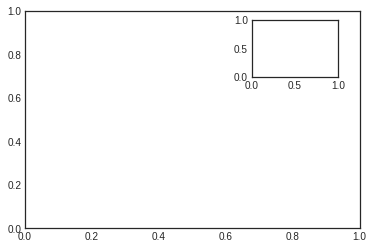

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

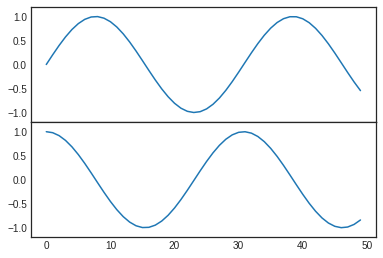

In [47]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

Simple Grids of Subplot

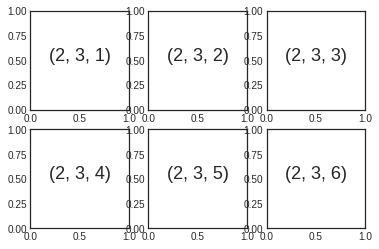

In [48]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

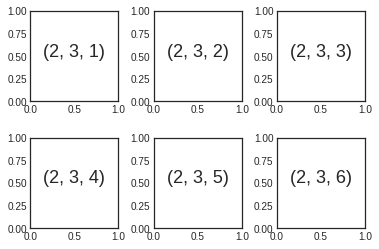

In [49]:
# plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

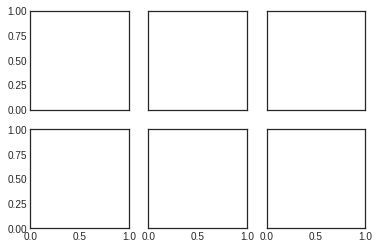

In [50]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

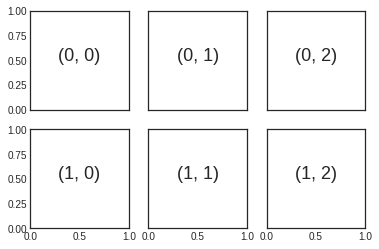

In [51]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

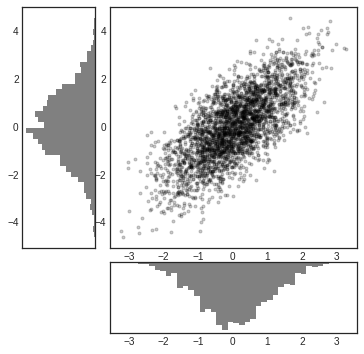

In [52]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

#### Scatter plots

Variables able to be highly correlated. To confirm or validate our hypothesis.

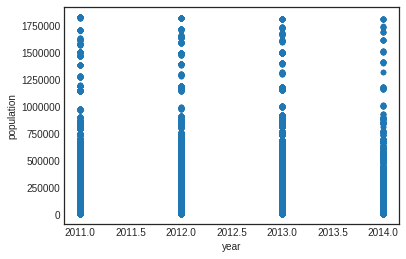

In [53]:
#figure.savefig('.../.jpeg')
df_sample['year'] = df_sample['year'].astype('int64')

df_sample.plot(kind='scatter',x='year',y='population')

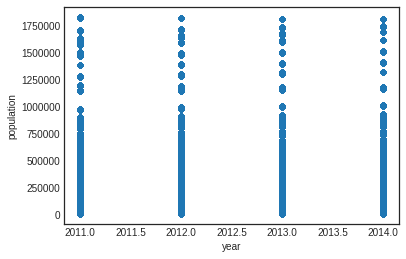

In [54]:
#figure.savefig('.../.jpeg')

df_copy.plot(kind='scatter',x='year',y='population')

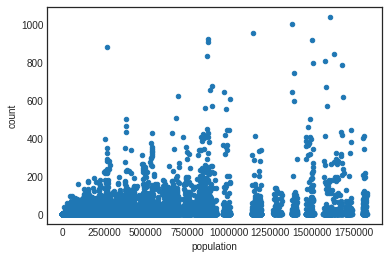

In [55]:
#figure.savefig('.../.jpeg')

df_sample.plot(kind='scatter',x='population',y='count')

In [56]:
df_sample.head()

,state_code,mun_code,year,month,crime,category,type,subtype,count,population
5336858,30,205,2012,5,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,2.0,19429
4548928,27,7,2012,1,ROBOS,ROBO COMUN,SIN VIOLENCIA,DE VEHICULOS,0.0,30202
547626,8,10,2013,3,PRIV. DE LA LIBERTAD (SECUESTRO),PRIV. DE LA LIBERTAD (SECUESTRO),SECUESTRO,SECUESTRO,2.0,23941
2979568,20,235,2012,3,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,SIN DATOS,2.0,3710
2884258,20,180,2013,11,ROBOS,ROBO EN INSTITUCIONES BANCARIAS,SIN VIOLENCIA,OTROS,2.0,2402


#### Histograms
Plotting histograms is a great way to visualize the distribution of a numerical variable. Plotting a histogram is a method to understand the most frequent ranges (or bins as they are called) in which the variable lies. One can also check whether the variable is normally distributed or skewed on one side.

Text(0.5, 1.0, 'Frequency of Crime')

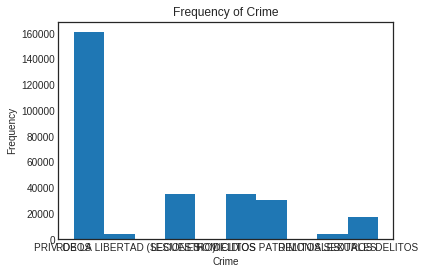

In [57]:
plt.hist(df_sample['crime'])
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.title('Frequency of Crime')

#### Boxplots
Boxplots are another way to understand the distribution of a numerical variable. It specifies something called quartiles.

If the numbers in a distribution with 100 numbers are arranged in an increasing order;
* the 1st quartile will occupy the 25th position, 
* the 3rd quartile will occupy the 75th position, and so on. 
* The median will be the average of the 50th and 51st terms.
* Median is the middle term when the numbers in the distribution are arranged in the increasing order. 
* Mode is the one that occurs with the maximum frequency, 
* while mean is the sum of all the numbers divided by their total count.

Text(0.5, 1.0, 'Box Plot of Crime categories')

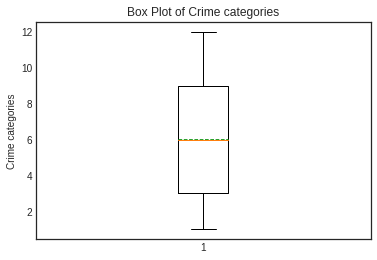

In [58]:
#plt.boxplot(df_sample['crime_cat'])
plt.boxplot(df_sample['month'], showmeans=True, meanline=True)
plt.ylabel('Crime categories')
plt.title('Box Plot of Crime categories')